In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import os
from datetime import date

#gamma function and integration
from scipy import special, optimize
from scipy import integrate
from scipy import stats


#Fitting the spectrum
from scipy.optimize import curve_fit


#Using csv tables
import pandas as pd

#Astropy module to handle units
import astropy
from astropy.io import ascii
from astropy import units as u
from astropy.units import Quantity
from astropy import constants as const

#Importing the constant that will be needed
from astropy.constants import c, k_B, m_e, e

golden = (1 + 5 ** 0.5) / 2

# Data selection

First, let's get the data that will be fitted.

In [39]:
data_rec = astropy.io.ascii.read(os.path.join('AT2019azh_radio_observations.dat'), guess=True)

#Replacing MJD time data to days since detection
data_rec['Time (MJD)']=data_rec['Time (MJD)']- 58528
data_rec.rename_column('Time (MJD)', 'Days since detection')
#Convert uJy to mJy
data_rec['Flux density (uJy)']= 1e-3*data_rec['Flux density (uJy)']
data_rec['Flux density error (uJy)']= 1e-3*data_rec['Flux density error (uJy)']
data_rec.rename_column('Flux density (uJy)', 'Flux density (mJy)')
data_rec.rename_column('Flux density error (uJy)', 'Flux density error (mJy)')

data_rec.colnames

['Days since detection',
 'Flux density (mJy)',
 'Flux density error (mJy)',
 'Frequency (GHz)',
 'Instrument',
 'Instrument Configuration']

Let's make a plot to visualize the data.

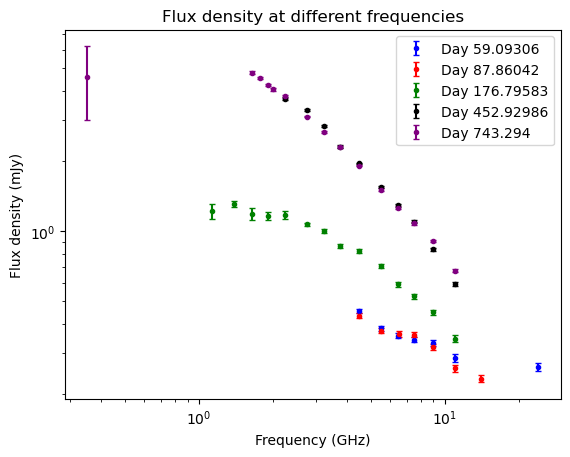

In [43]:
#For the plot lets go trhought rows and plotting each day in a colour
fig, ax = plt.subplots()
for freq in data_rec:
    day= round(freq['Days since detection'],5)
    if day ==  59.09306:
        ax.errorbar(freq['Frequency (GHz)'], freq['Flux density (mJy)'], yerr= freq['Flux density error (mJy)'], 
                     fmt= '.',capsize= 2 , c='blue', zorder=8, label= f'Day {day}' )
    if day ==  87.86042:
        ax.errorbar(freq['Frequency (GHz)'], freq['Flux density (mJy)'], yerr= freq['Flux density error (mJy)'], 
                     fmt= '.',capsize= 2 , c='red', zorder=8, label= f'Day {day}' )
    if day ==  176.79583:
        ax.errorbar(freq['Frequency (GHz)'], freq['Flux density (mJy)'], yerr= freq['Flux density error (mJy)'], 
                     fmt= '.',capsize= 2 , c='green', zorder=8, label= f'Day {day}' )
    if day ==  452.92986:
        ax.errorbar(freq['Frequency (GHz)'], freq['Flux density (mJy)'], yerr= freq['Flux density error (mJy)'], 
                     fmt= '.',capsize= 2 , c='black', zorder=8, label= f'Day {day}' )
    if day == 743.294:
        ax.errorbar(freq['Frequency (GHz)'], freq['Flux density (mJy)'], yerr= freq['Flux density error (mJy)'], 
                     fmt= '.',capsize= 2 , c='purple', zorder=8, label= f'Day {day}' )

#Function to only plot labels once
def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))

legend_without_duplicate_labels(ax)

plt.yscale('log')
plt.xscale('log')
plt.xlabel(f"Frequency (GHz)")
plt.ylabel(f'Flux density (mJy)')
plt.title('Flux density at different frequencies')
plt.show()